In [1]:
# import the necessart dependencies
import pandas as pd
import numpy as np

In [2]:
# load the dataset
df = pd.read_csv('../data/raw/Fraud_Data.csv')

Checking the data out

In [4]:
df.head() # check the top 5 data in the dataset

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
df.info() # check the basic information about the dataset such as datatypes and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
df.describe() # Statistical summery of the dataset

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Data Cleaning

In [ ]:
# handling missing values
df.isnull().sum() # there are no missing values in the dataset


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [11]:
# Remove Duplicate values
df.duplicated().sum()  # the data has no duplicate values


np.int64(0)

In [14]:
# Correct datatypes
df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [15]:
# convert times to datetime
df["signup_time"] = pd.to_datetime(df["signup_time"])
df["purchase_time"] = pd.to_datetime(df["purchase_time"])

In [17]:
# convert strings to categories
for col in ["source", "browser", "sex"]:
    df[col] = df[col].astype('category')

In [18]:
# verifying data changes to appropriate datatypes
df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address                 int64
class                      int64
dtype: object

Exploratory Data Analysis

In [20]:
# Univariate analysis: distribution of key variables
import matplotlib.pyplot as plt
import seaborn as sns

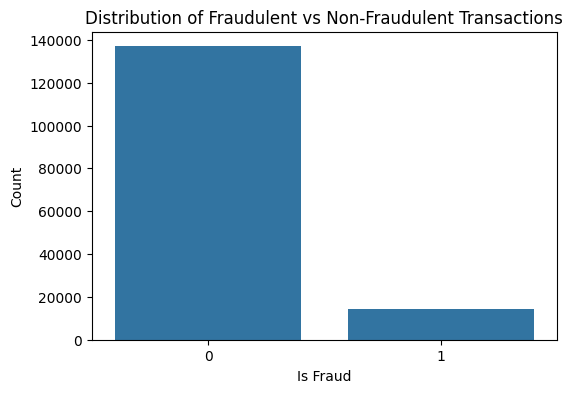

In [21]:
# class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.
# Distribution of the target variable 'class'
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

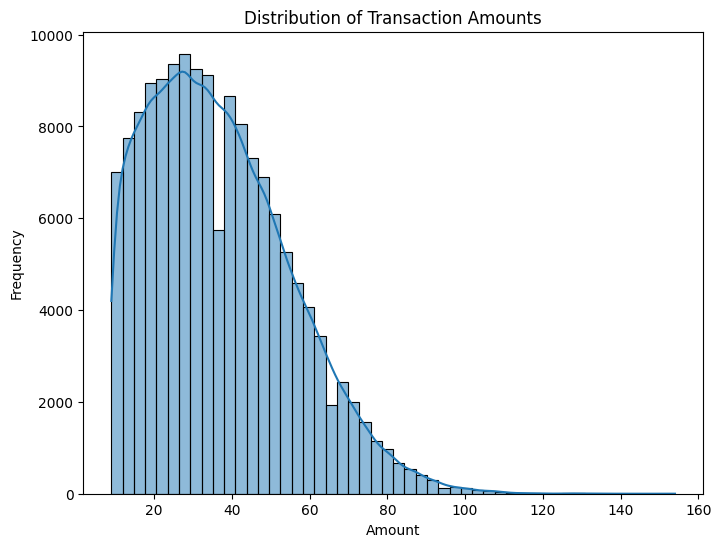

In [23]:
# Distribution of 'purchase_value' variable
plt.figure(figsize=(8,6))
sns.histplot(df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


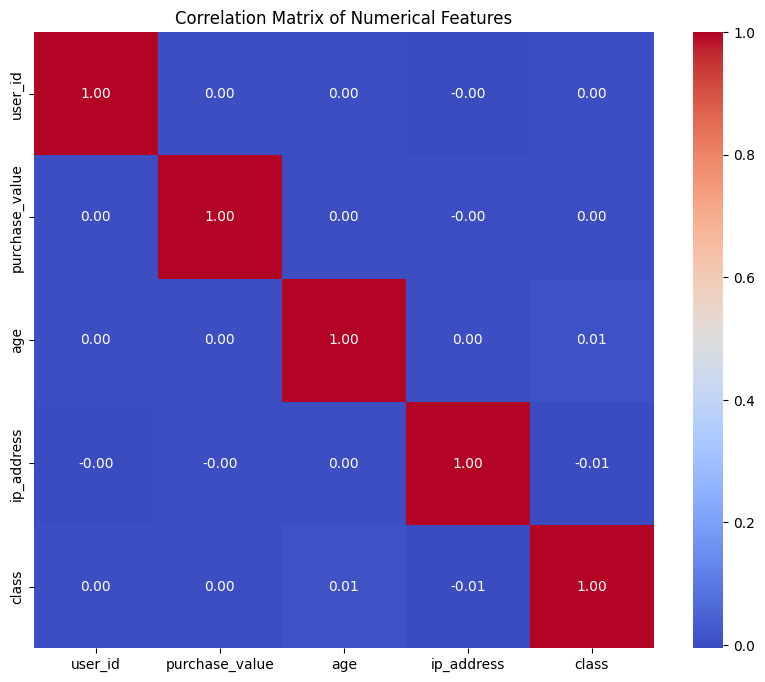

In [25]:
# Bivariate analysis
# Correlation matrix to see relationships between numerical variables
plt.figure(figsize=(10,8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

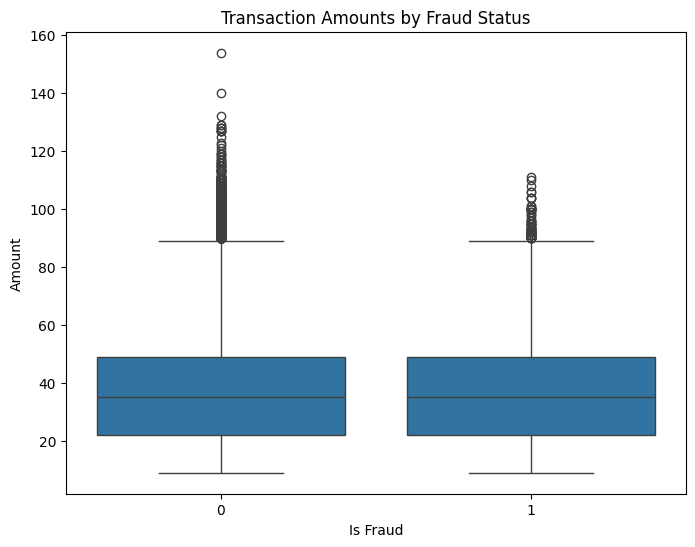

In [26]:
# relationship between 'purchase_value' and 'is_fraud'
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

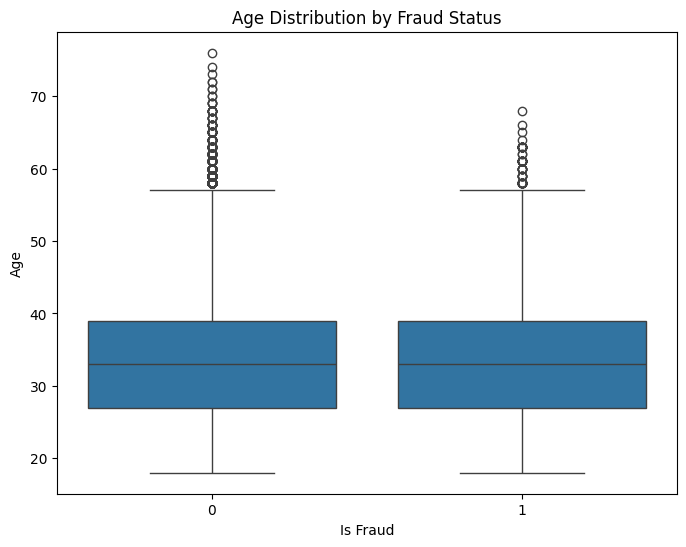

In [ ]:
# relationship between age and 'is_fraud
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Age')
plt.show()

Class Distribution:
 class
0    136961
1     14151
Name: count, dtype: int64


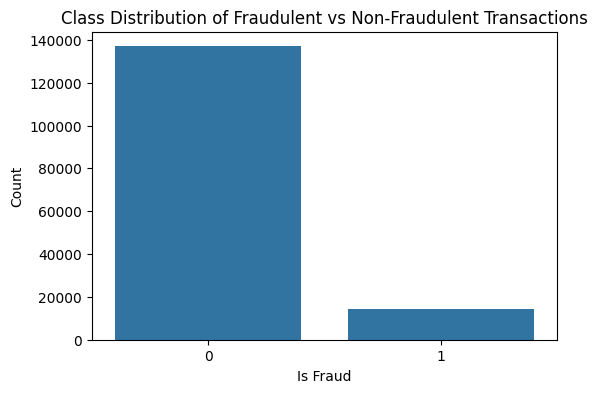

In [ ]:
# Class distribution analysis: quantify the imbalance between fraudulent and non-fraudulent transactions
fraud_counts = df['class'].value_counts()
print("Class Distribution:\n", fraud_counts)
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Class Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

Geolocation Integration

In [30]:
# Convert IP addresses to integer format for better analysis
df["ip_address"] = df["ip_address"].astype('int')

In [37]:
# merge fraud_data.csv with ipaddress_to_country.csv using rang-based lookup
ip_df = pd.read_csv('../data/raw/ipaddress_to_country.csv')
# ip_df has "lower_bound_ip_address" and "upper_bound_ip_address"
ip_df["lower_bound_ip_address"] = ip_df["lower_bound_ip_address"].astype('int')
ip_df["upper_bound_ip_address"] = ip_df["upper_bound_ip_address"].astype('int')

In [38]:
df = pd.merge_asof(df.sort_values('ip_address'),
                   ip_df.sort_values('lower_bound_ip_address'),
                   left_on='ip_address',
                   right_on='lower_bound_ip_address',
                   direction='backward')

In [39]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address_x,upper_bound_ip_address_x,country_x,lower_bound_ip_address_y,upper_bound_ip_address_y,country_y,lower_bound_ip_address,upper_bound_ip_address,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,39,DDZWCUYTHKALI,Direct,FireFox,F,36,4294673680,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,62,YJLXUZPSHUOOS,SEO,IE,M,22,4294714854,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,17,LPIWPXJCMYJOT,SEO,FireFox,M,19,4294719533,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,9,TSDCMHPWAUZAR,Ads,IE,F,35,4294822241,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia


In [40]:
# 2. Check if the IP actually fits inside the range found
# If ip_address > upper_bound, it's actually in a "gap"
df.loc[df['ip_address'] > df['upper_bound_ip_address'], 'country'] = 'Unknown'

# 3. Fill the NaN values (for IPs that were too small to match anything)
df['country'] = df['country'].fillna('Unknown')

# 4. (Optional) Drop the bound columns to keep your data clean
df = df.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'])

In [41]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address_x,upper_bound_ip_address_x,country_x,lower_bound_ip_address_y,upper_bound_ip_address_y,country_y,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,39,DDZWCUYTHKALI,Direct,FireFox,F,36,4294673680,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,62,YJLXUZPSHUOOS,SEO,IE,M,22,4294714854,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,17,LPIWPXJCMYJOT,SEO,FireFox,M,19,4294719533,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,9,TSDCMHPWAUZAR,Ads,IE,F,35,4294822241,0,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown


In [44]:
# Analyze fraud patterns by country
fraud_by_country = df.groupby('country')['class'].value_counts().unstack().fillna(0)
fraud_by_country['fraud_ratio'] = fraud_by_country[1] / (fraud_by_country[0] + fraud_by_country[1])
fraud_by_country = fraud_by_country.sort_values(by='fraud_ratio', ascending=False)
fraud_by_country

class,0,1,fraud_ratio
country,,,
Turkmenistan,0.0,1.0,1.000000
Namibia,13.0,10.0,0.434783
Sri Lanka,18.0,13.0,0.419355
Luxembourg,44.0,28.0,0.388889
Virgin Islands (U.S.),2.0,1.0,0.333333
...,...,...,...
Uganda,13.0,0.0,0.000000
Vanuatu,1.0,0.0,0.000000
Yemen,1.0,0.0,0.000000


In [72]:
fraud_by_country['fraud_ratio']

country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
                           ...   
Uganda                   0.000000
Vanuatu                  0.000000
Yemen                    0.000000
Zambia                   0.000000
Zimbabwe                 0.000000
Name: fraud_ratio, Length: 182, dtype: float64

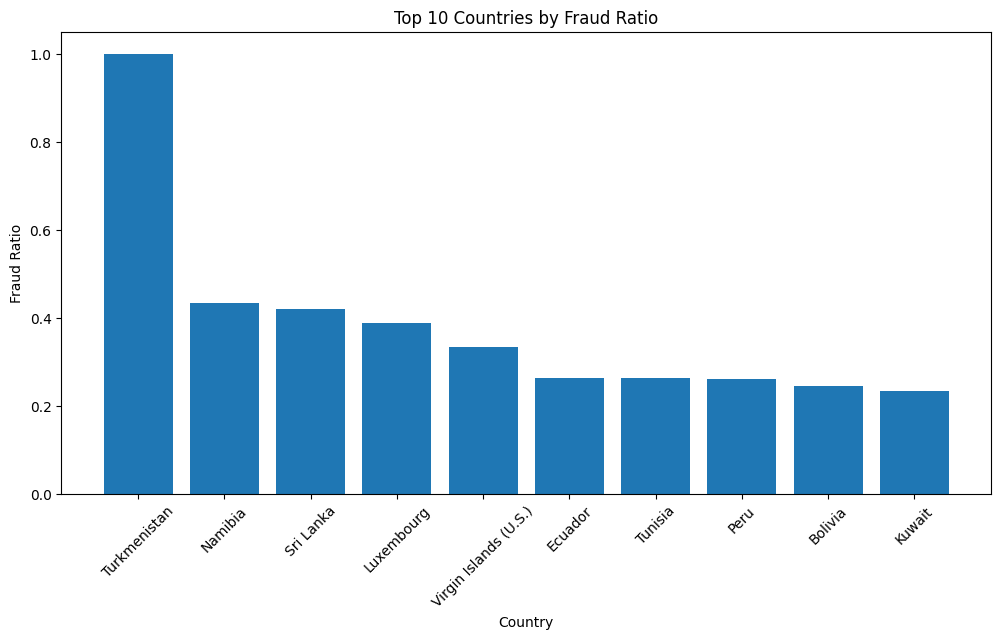

In [75]:
# Select only the top 10 countries for both labels and data
top_10_fraud = fraud_by_country.head(10)

plt.figure(figsize=(12, 6))

# Ensure both index (x) and values (height) are sliced equally
plt.bar(top_10_fraud.index, top_10_fraud['fraud_ratio'])

plt.xticks(rotation=45) # 45 degrees is often more readable than 90
plt.xlabel('Country')
plt.ylabel('Fraud Ratio')
plt.title('Top 10 Countries by Fraud Ratio')
plt.show()

Feature Engineering

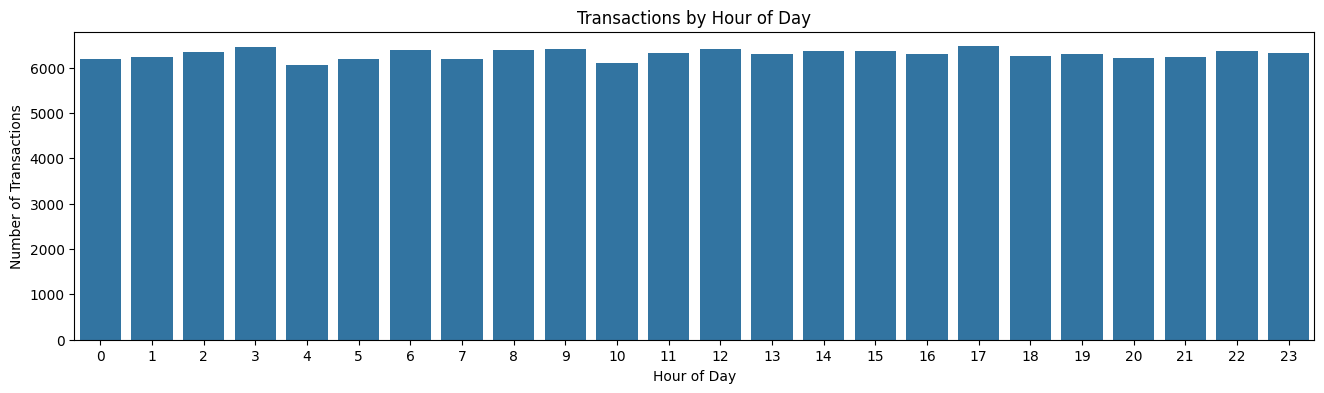

In [ ]:
# Transaction frequency and velocity: number of transactions per uer in time windows
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    
df['hour_of_day'] = df['purchase_time'].dt.hour
df['day_of_week'] = df['purchase_time'].dt.dayofweek
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600.0  # in hours
df[['hour_of_day', 'day_of_week', 'time_since_signup']].head()
# Visualize time-based features
plt.figure(figsize=(16,4))
sns.countplot(x='hour_of_day', data=df)
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

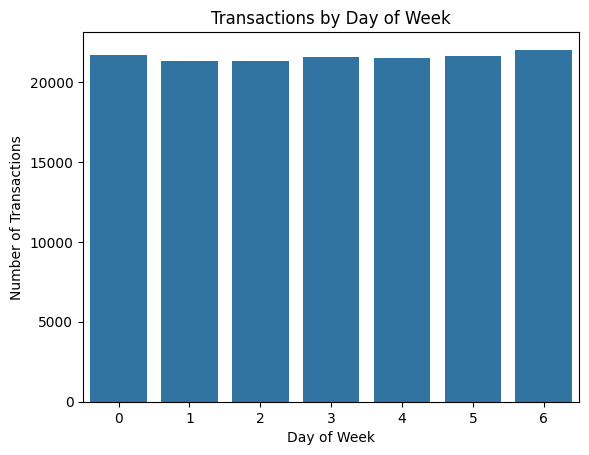

In [48]:
sns.countplot(x='day_of_week', data=df)
plt.title('Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

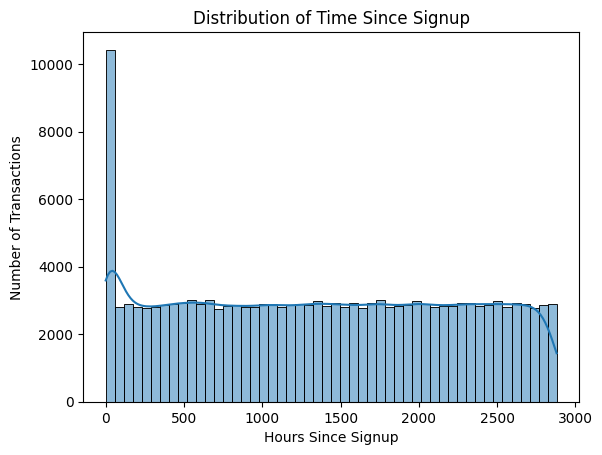

In [50]:
sns.histplot(df['time_since_signup'], bins=50, kde=True)
plt.title('Distribution of Time Since Signup')
plt.xlabel('Hours Since Signup')
plt.ylabel('Number of Transactions')
plt.show()

Data Transformation

In [ ]:
# Normalize/scale numerical features(Standard scaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['purchase_value', 'age', 'time_since_signup']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features].head()

,purchase_value,age,time_since_signup
0,0.494721,0.331793,-1.013679
1,-0.214781,-0.364448,-1.230613
2,-0.214781,-0.132367,-1.337931
3,-0.214781,0.795954,0.800513
4,0.985915,0.563874,-1.127359


In [52]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,lower_bound_ip_address_x,upper_bound_ip_address_x,country_x,lower_bound_ip_address_y,upper_bound_ip_address_y,country_y,country,hour_of_day,day_of_week,time_since_signup
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,0.494721,ZCLZTAJPCRAQX,Direct,Safari,M,0.331793,52093,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,10,6,-1.013679
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,-0.214781,YFGYOALADBHLT,Ads,IE,F,-0.364448,93447,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,17,4,-1.230613
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,-0.214781,QZNVQTUITFTHH,Direct,FireFox,F,-0.132367,105818,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,8,1,-1.337931
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,-0.214781,PIBUQMBIELMMG,Ads,IE,M,0.795954,117566,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,21,3,0.800513
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,0.985915,WFIIFCPIOGMHT,Ads,Safari,M,0.563874,131423,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,7,6,-1.127359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,0.112681,DDZWCUYTHKALI,Direct,FireFox,F,0.331793,4294673680,...,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown,21,4,1.370736
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,1.367955,YJLXUZPSHUOOS,SEO,IE,M,-1.292769,4294714854,...,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown,4,4,-1.027653
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,-1.088015,LPIWPXJCMYJOT,SEO,FireFox,M,-1.640890,4294719533,...,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown,6,5,0.229403
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,-1.524632,TSDCMHPWAUZAR,Ads,IE,F,0.215753,4294822241,...,3.758096e+09,3.758096e+09,Australia,3.758096e+09,3.758096e+09,Australia,Unknown,9,4,0.516012


In [ ]:
# Encode Categorical features(one-hot encoding)
df = pd.get_dummies(df, columns=['source', 'browser', 'sex'], drop_first=True)

In [56]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address_x,upper_bound_ip_address_x,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,0.494721,ZCLZTAJPCRAQX,0.331793,52093,0,NaN,NaN,...,False,True,False,False,False,False,False,True,False,True
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,-0.214781,YFGYOALADBHLT,-0.364448,93447,0,NaN,NaN,...,True,False,False,False,False,True,False,False,True,False
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,-0.214781,QZNVQTUITFTHH,-0.132367,105818,0,NaN,NaN,...,False,True,False,False,True,False,False,False,True,False
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,-0.214781,PIBUQMBIELMMG,0.795954,117566,0,NaN,NaN,...,True,False,False,False,False,True,False,False,False,True
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,0.985915,WFIIFCPIOGMHT,0.563874,131423,0,NaN,NaN,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,0.112681,DDZWCUYTHKALI,0.331793,4294673680,0,3.758096e+09,3.758096e+09,...,False,True,False,False,True,False,False,False,True,False
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,1.367955,YJLXUZPSHUOOS,-1.292769,4294714854,0,3.758096e+09,3.758096e+09,...,False,False,True,False,False,True,False,False,False,True
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,-1.088015,LPIWPXJCMYJOT,-1.640890,4294719533,0,3.758096e+09,3.758096e+09,...,False,False,True,False,True,False,False,False,False,True
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,-1.524632,TSDCMHPWAUZAR,0.215753,4294822241,0,3.758096e+09,3.758096e+09,...,True,False,False,False,False,True,False,False,True,False


Handle Class Imbalance

In [64]:
# Apply SMOTE or undersampling to training data to handle class imbalance

# More Feature engineering and selection
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Drop high-cardinality IDs and the target
X = df.drop(['class', 'user_id', 'device_id'], axis=1)
y = df['class']

# 1. Drop timestamps (engineered time_diff)
X = df.drop(['signup_time', 'purchase_time'], axis=1)

# 2. Drop all remaining 'object' (string) columns
X = X.select_dtypes(exclude=['object'])

# 3. Drop redundant merge artifacts
cols_to_drop = ['lower_bound_ip_address_x', 'upper_bound_ip_address_x', 
                'lower_bound_ip_address_y', 'upper_bound_ip_address_y', 'class']
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])

# 4. Convert Booleans (True/False) to Integers (0/1)
X = X.astype(float)

# 5. Handle any NaNs (SMOTE cannot handle missing values)
X = X.fillna(0)

# make sure everything is numeric
print(X.dtypes)


user_id              float64
purchase_value       float64
age                  float64
ip_address           float64
hour_of_day          float64
day_of_week          float64
time_since_signup    float64
source_Ads           float64
source_Direct        float64
source_SEO           float64
browser_Chrome       float64
browser_FireFox      float64
browser_IE           float64
browser_Opera        float64
browser_Safari       float64
sex_F                float64
sex_M                float64
time_diff            float64
dtype: object


In [ ]:
# 1. Separate your target
y = df['class']

# 2. Drop the target AND the original datetime columns from X
# We use 'errors=ignore' just in case you already dropped them
X = df.drop(['class', 'signup_time', 'purchase_time'], axis=1, errors='ignore')

# 3. Drop any other non-numeric columns (like 'country' or 'device_id')
X = X.select_dtypes(include=['number', 'bool'])

# 4. Explicitly convert all Booleans to Floats
X = X.astype('float64')

# 5. CRITICAL: SMOTE cannot handle NaNs (Missing Values)
# Since you have NaN in 'country' or other areas, we must fill them
X = X.fillna(0)

# 6. Now run SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Success! Resampled shape:", X_resampled.shape)

Success! Resampled shape: (273922, 22)


Justification for SMOTE
In fraud detection, the dataset is almost always highly imbalanced (e.g., 99% legitimate, 1% fraud). If you train a model on this, it will simply learn to predict "Not Fraud" for every transaction and still achieve 99% accuracy while missing all the actual fraud.

Why choose SMOTE over other methods?

Overcomes Overfitting: Unlike "Random Oversampling" (which just duplicates rows), SMOTE creates new, synthetic fraud examples by drawing lines between existing ones. This helps the model learn the general "region" of fraud rather than just memorizing specific fraudulent transactions.

Preserves Information: Unlike "Undersampling" (which deletes thousands of legitimate transactions to match the small number of fraud cases), SMOTE keeps all your valuable data from the majority class.

Better Decision Boundaries: By filling in the gaps between fraud cases, it helps the classifier (like Random Forest or XGBoost) draw a clearer line between what is a normal purchase and what is a bot/fraudulent purchase.J

--- CLASS DISTRIBUTION: BEFORE SMOTE ---
Legit (Class 0): 136961 (90.64%)
Fraud (Class 1): 14151 (9.36%)

--- CLASS DISTRIBUTION: AFTER SMOTE ---
Legit (Class 0): 136961 (50.00%)
Fraud (Class 1): 136961 (50.00%)


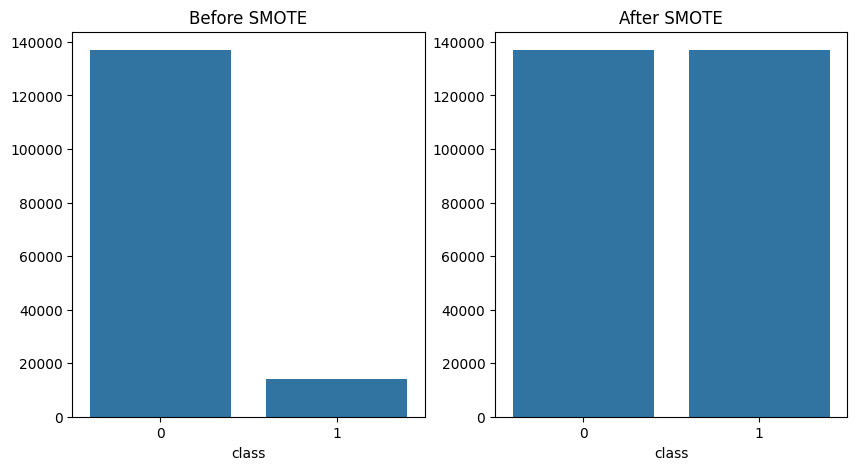

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate distribution before resampling
before_dist = y.value_counts()
before_pct = y.value_counts(normalize=True) * 100

# 2. Calculate distribution after resampling
after_dist = pd.Series(y_resampled).value_counts()
after_pct = pd.Series(y_resampled).value_counts(normalize=True) * 100

# 3. Print the Documentation
print("--- CLASS DISTRIBUTION: BEFORE SMOTE ---")
print(f"Legit (Class 0): {before_dist[0]} ({before_pct[0]:.2f}%)")
print(f"Fraud (Class 1): {before_dist[1]} ({before_pct[1]:.2f}%)")
print("\n--- CLASS DISTRIBUTION: AFTER SMOTE ---")
print(f"Legit (Class 0): {after_dist[0]} ({after_pct[0]:.2f}%)")
print(f"Fraud (Class 1): {after_dist[1]} ({after_pct[1]:.2f}%)")

# 4. Optional: Visual Documentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=before_dist.index, y=before_dist.values)
plt.title("Before SMOTE")

plt.subplot(1, 2, 2)
sns.barplot(x=after_dist.index, y=after_dist.values)
plt.title("After SMOTE")
plt.show()